# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [1]:
import pickle
import nltk

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [3]:
import pandas as pd

data = pd.read_csv('product_reviews.csv')
data.shape

(26661, 3)

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [5]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/muskan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/muskan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Cleaning the data

In [6]:
# preprocessing text
import string
newText = []

for review in data["text"]:
    cleanedReview = review.translate (str.maketrans ('', '', string.punctuation))

    # removing stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(cleanedReview)
    cleanedText = [w for w in word_tokens if not w.lower() in stop_words]

    # performing stemming
    porter_stemmer = PorterStemmer()
    stemmedText = [porter_stemmer.stem(w) for w in cleanedText]

    # joining the list of words to form a string
    preprocessed_text = ' '.join(stemmedText)

    newText.append(preprocessed_text)

data["cleanedText"] = newText
    


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report


In [8]:
text = newText
countVect = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')
countMatrix = countVect.fit_transform(text)
count_array = countMatrix.toarray()
df = pd.DataFrame(data=count_array,columns = countVect.get_feature_names_out())
print(df)

       aaa  aaaaaaamaaaaaz  aaaand  aagent  aaliyah  aamco  aaron  aaronwa  \
0        0               0       0       0        0      0      0        0   
1        0               0       0       0        0      0      0        0   
2        0               0       0       0        0      0      0        0   
3        0               0       0       0        0      0      0        0   
4        0               0       0       0        0      0      0        0   
...    ...             ...     ...     ...      ...    ...    ...      ...   
26656    0               0       0       0        0      0      0        0   
26657    0               0       0       0        0      0      0        0   
26658    0               0       0       0        0      0      0        0   
26659    0               0       0       0        0      0      0        0   
26660    0               0       0       0        0      0      0        0   

       ab  abandon  ...  zucchini  zum  zumal  zuman  zumba  zu

### Splitting the Data

In [9]:
xtrain = data.loc[train_test_index_dict["train_index"], "cleanedText"]
xtest = data.loc[train_test_index_dict["test_index"], "cleanedText"]
ytrain = data.loc[train_test_index_dict["train_index"], "stars"]
ytest = data.loc[train_test_index_dict["test_index"], "stars"]


In [10]:
print(ytrain)

6914     5.0
8332     5.0
2791     4.0
25106    5.0
11135    4.0
        ... 
22447    1.0
26207    5.0
8429     1.0
20411    4.0
15380    2.0
Name: stars, Length: 17862, dtype: float64


### Bag of Words Features

In [11]:
# making Bow model for train and test
vect = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')
xtrainBow = vect.fit_transform(xtrain)
xtestBow = vect.transform(xtest)

# training the naive bayes model
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB()
nbc.fit(xtrainBow, ytrain)

ypred = nbc.predict(xtestBow)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.73      0.76      0.74      1149
         2.0       0.47      0.10      0.16       587
         4.0       0.47      0.51      0.49      1981
         5.0       0.79      0.83      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.62      0.55      0.55      8799
weighted avg       0.69      0.70      0.69      8799



### Using tf-idf features

In [12]:
# making the model with tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVect = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b')
xtrainTfidf = tfidfVect.fit_transform(xtrain)
xtestTfidf = tfidfVect.transform(xtest)

# performing naive bayes on tf-idf features
nbcTfIdf = MultinomialNB()
nbcTfIdf.fit(xtrainTfidf, ytrain)
ypredict = nbcTfIdf.predict(xtestBow)

print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

         1.0       0.91      0.25      0.40      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.44      0.05      0.09      1981
         5.0       0.61      0.99      0.76      5082

    accuracy                           0.62      8799
   macro avg       0.49      0.32      0.31      8799
weighted avg       0.57      0.62      0.51      8799



/home/muskan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muskan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muskan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Report

The accuracy of the bag of words approach is 70%, while for TF-IDF, it drops to 62%.
This indicates that the bag of words approach performs better overall in terms of correctly predicting the classes. We also notice that bag of words generally exhibits higher recall across classes compared to TF-IDF. 
From the above metrics we can see that class 2.0 suffers from low support, indicating class imbalance issues affecting classification performance.
TF-IDF struggles with precision and recall for class 2.0, indicating classification difficulties. Even though bag of words has low metrics for class 2 it still performs better than TF-IDF comparatively. 

The overall weighted averages and macro from precision, F1-score and recall are lower in TF-IDF. This shows that overall TF-IDF performs worse than BoW across all classes and thus BoW is more effective for classifying documents than TF-IDF. 

### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [13]:
import gzip
import numpy as np

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

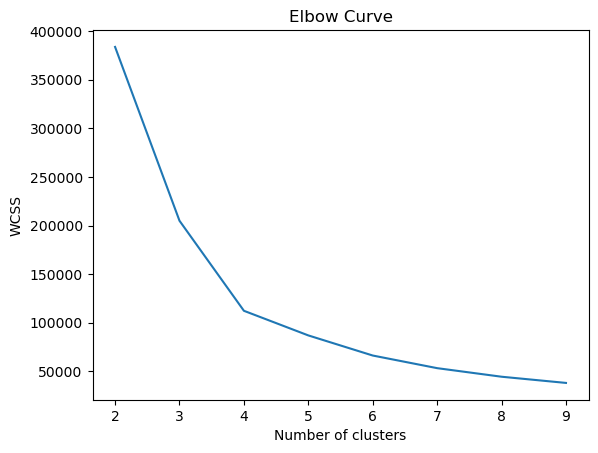

In [14]:
# performing k means clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kvalsNormal = []
wcssNormal = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=41).fit(embeds)
    kvalsNormal.append(k)
    wcssNormal.append(kmeans.inertia_)


plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(kvalsNormal, wcssNormal)

# calculation of purity score
labels_true_normal = np.array(data.stars).astype(int) 
labels_pred_normal = kmeans.labels_

### With different Kmeans Algorithms

/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

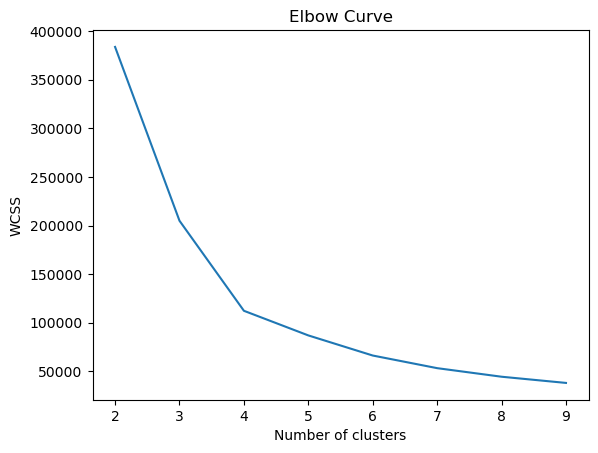

In [15]:
# with kmeans++ initialization
kvalsPlus = []
wcssPlus = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=41, init="k-means++").fit(embeds)
    kvalsPlus.append(k)
    wcssPlus.append(kmeans.inertia_)

plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(kvalsPlus, wcssPlus)

labels_true_plus = np.array(data.stars).astype(int) 
labels_pred_plus = kmeans.labels_

/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

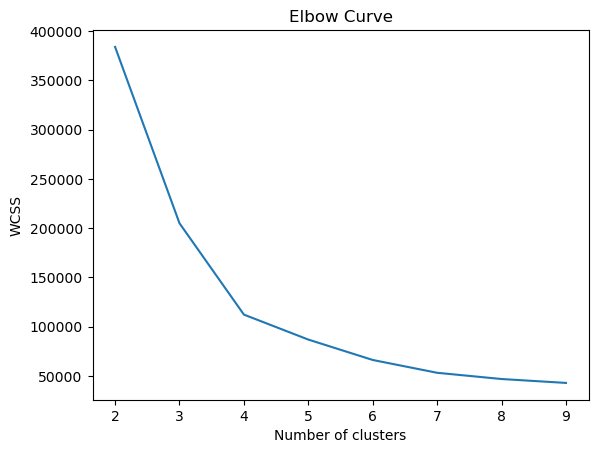

In [16]:
# with forgy initialization
kvalsForgy = []
wcssForgy = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=41, init="random").fit(embeds)
    kvalsForgy.append(k)
    wcssForgy.append(kmeans.inertia_)

plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(kvalsForgy, wcssForgy)

labels_true_forgy = np.array(data.stars).astype(int) 
labels_pred_forgy = kmeans.labels_

### Calculating purity

In [28]:
# calculating for k =5
kmeans = KMeans(n_clusters=5, random_state=41).fit(embeds)
labels_true = np.array(data.stars).astype(int)
labels_pred_normal = kmeans.labels_

kmeansPlus= KMeans(n_clusters=5, random_state=41, init="k-means++").fit(embeds)
labels_pred_plus = kmeansPlus.labels_

kmeansForgy = KMeans(n_clusters=5, random_state=41, init="random").fit(embeds)
labels_pred_forgy = kmeansForgy.labels_

/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/muskan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
def purity_score(labels_true, labels_pred):
    # iterate through all the clusters and find the majority class
    majority_class = []
    correctly_classified = 0

    for cluster in range(5):
        majority_class.append(np.argmax(np.bincount(labels_true[labels_pred == cluster])))

        #  how many points in the cluster are of the majority class
        correctly_classified += np.sum(labels_true[labels_pred == cluster] == majority_class[cluster])

    purity = correctly_classified / len(labels_true)
    return purity

print("Purity score for kmeans normal =", purity_score(labels_true_normal, labels_pred_normal))
print("Purity score for kmeans++ =", purity_score(labels_true_plus, labels_pred_plus))
print("Purity score for forgy =", purity_score(labels_true_forgy, labels_pred_forgy))

Purity score for kmeans normal = 0.711113611642474
Purity score for kmeans++ = 0.711113611642474
Purity score for forgy = 0.711113611642474


### Calculating NMI

In [30]:
# nmi = 2 * I(Y, C) / (H(Y) + H(C))
# nmi from scratch 
def nmi(y,c):
    def entropy(y):
        unique, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return -np.sum(probs * np.log2(probs))

    # calculating mutual information
    def mutual_info(y, c):
        unique_y, counts_y = np.unique(y, return_counts=True)
        unique_c, counts_c = np.unique(c, return_counts=True)
        probs_y = counts_y / len(y)
        probs_c = counts_c / len(c)
        probs_joint = np.zeros((len(unique_y), len(unique_c)))

        for i in range(len(y)):
            y_index = np.where(unique_y == y[i])[0][0]  
            c_index = np.where(unique_c == c[i])[0][0] 
            probs_joint[y_index, c_index] += 1

        probs_joint /= len(y)

        mi = 0
        for i in range(len(unique_y)):
            for j in range(len(unique_c)):
                if probs_joint[i, j] != 0:
                    mi += probs_joint[i, j] * np.log2(probs_joint[i, j] / (probs_y[i] * probs_c[j]))

        return mi

    # calculating nmi
    return 2 * mutual_info(y, c) / (entropy(y) + entropy(c))

print("NMI score for kmeans normal =", nmi(labels_true_normal, labels_pred_normal))
print("NMI score for kmeans++ =", nmi(labels_true_plus, labels_pred_plus))
print("NMI score for forgy =", nmi(labels_true_forgy, labels_pred_forgy))


NMI score for kmeans normal = 0.46096858705826865
NMI score for kmeans++ = 0.46096858705826865
NMI score for forgy = 0.460975742080248


### Calculating Rand Score

In [31]:
def rand_index(labels_true, labels_pred):
    majority_class = []

    for cluster in range(5):
        majority_class.append(np.argmax(np.bincount(labels_true[labels_pred == cluster])))


    true_positive = 0
    true_negative = 0
    total_pairs = len(labels_true) * (len(labels_true) - 1) // 2

    for i in range(len(labels_true)):
        for j in range(i + 1, len(labels_true)):
            
            if (labels_true[i] == labels_true[j]) and (majority_class[labels_pred[i]] == majority_class[labels_pred[j]]):
                true_positive += 1
            if (labels_true[i] != labels_true[j]) and (majority_class[labels_pred[i]] != majority_class[labels_pred[j]]):
                true_negative += 1

    rand_index = (true_positive + true_negative) / total_pairs

    return rand_index

print("Rand index score for kmeans normal = ", rand_index(labels_true_normal, labels_pred_normal))
print("Rand index score for kmeans++ = ", rand_index(labels_true_plus, labels_pred_plus))
print("Rand index score for forgy = ", rand_index(labels_true_forgy, labels_pred_forgy))

Rand index score for kmeans normal =  0.7252501462262156
Rand index score for kmeans++ =  0.7252501462262156
Rand index score for forgy =  0.7252501462262156


### Clustering evaluation

We see that from the above graphs that the elbow for the clustering occurs at around k = 4. When the elbow occurs at k = 4, it means that adding more clusters beyond this point doesn't make much improvement in how well the data is grouped together. It is the best k where the clusters capture most of the patterns in the data without unnecessary complexity. So, k = 4 seems like a reasonable choice for the number of clusters in this case.

The clustering findings for k = 5 utilising various initialization techniques (normal, kmeans++, and forgy) are consistent across all evaluation criteria (purity, NMI, and Rand index) based on the metrics provided. While the NMI and Rand index scores indicate moderate to high agreement between the clustering and true labels, the purity scores show that most of the data points inside each cluster belong to the same class.